# Lab Program 1
## Implement and demonstratetheFIND-Salgorithm for finding the most specific hypothesis based on a given set of training data samples. Read the training data from a .CSV file and show the output for test cases. Develop an interactive program by Compareing the result by implementing LIST THEN ELIMINATE algorithm.

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('finds1.csv')
def train(concepts, target):
    for i, val in enumerate(target):
        if val == "Yes":
            specific_h = concepts[i]
            break
    for i,h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] == specific_h[x]:
                    pass
                else:
                    specific_h[x] = "?"
    return specific_h
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
print(train(concepts,target))

['Sunny' 'Warm' '?' 'Strong' '?' '?']


In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('finds1.csv')
def list_then_eliminate(concepts, target):
    positive_examples = concepts[target == 'Yes']
    specific_hypothesis = positive_examples[0].copy()
    for example in positive_examples[1:]:
        for i, attribute in enumerate(example):
            if attribute != specific_hypothesis[i]:
                specific_hypothesis[i] = '?'
    return specific_hypothesis
def train(concepts, target):
    for i, val in enumerate(target):
        if val == "Yes":
            specific_h = concepts[i]
            break
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] == specific_h[x]:
                    pass
                else:
                    specific_h[x] = "?"
        return specific_h
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
print('Specific hypothesis obtained by LIST THEN ELIMINATE algorithm:')
print(list_then_eliminate(concepts, target))
print('\nSpecific hypothesis obtained by the original code:')
print(train(concepts, target))

Specific hypothesis obtained by LIST THEN ELIMINATE algorithm:
['Sunny' 'Warm' '?' 'Strong' '?' '?']

Specific hypothesis obtained by the original code:
['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']


# Lab Program 2
## For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Eliminationalgorithm. Output a description of the set of all hypotheses consistent with the training examples

In [3]:
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv('finds1.csv'))
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
    indices = [i for i,val in enumerate(general_h) if val == ['?','?','?','?','?','?']]
    for i in indices:
        general_h.remove(['?','?','?','?','?','?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final S:", s_final, sep="\n")
print("Final G:", g_final, sep="\n")
data.head()

Final S:
['Sunny' 'Warm' '?' 'Strong' '?' '?']
Final G:
[['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


,Sky,Airtemp,Humidity,Wind,Water,Forecast,WaterSport
0,Sunny,Warm,Normal,Strong,Warm,Same,Yes
1,Sunny,Warm,High,Strong,Warm,Same,Yes
2,Cloudy,Cold,High,Strong,Warm,Change,No
3,Sunny,Warm,High,Strong,Cool,Change,Yes


# Lab Program 3
## Demonstrate Pre processing (Data Cleaning, Integration and Transformation) activity on suitable data:
### For example:
### Identify and Delete Rows that Contain Duplicate Data by considering an appropriate dataset.
### Identify and Delete Columns That Contain a Single Value by considering an appropriate dataset.

In [4]:
import pandas as pd
data1 = {'A': [1, 2, 2, 3, 4, 5, 5],
         'B': [5, 6, 6, 7, 8, 9, 9]}
data2 = {'C': [10, 10, 10, 10, 10],
         'D': [11, 12, 13, 14, 15]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
print("Before removing duplicates in dataset 1:")
print(df1)
df1.drop_duplicates(inplace=True)
print("\nAfter removing duplicates in dataset 1:")
print(df1)
print("\nBefore removing single value columns in dataset 2:")
print(df2)
cols_to_remove = [col for col in df2.columns if df2[col].nunique() <= 1]
df2.drop(cols_to_remove, axis=1, inplace=True)
print("\nAfter removing single value columns in dataset 2:")
print(df2)

Before removing duplicates in dataset 1:
   A  B
0  1  5
1  2  6
2  2  6
3  3  7
4  4  8
5  5  9
6  5  9

After removing duplicates in dataset 1:
   A  B
0  1  5
1  2  6
3  3  7
4  4  8
5  5  9

Before removing single value columns in dataset 2:
    C   D
0  10  11
1  10  12
2  10  13
3  10  14
4  10  15

After removing single value columns in dataset 2:
    D
0  11
1  12
2  13
3  14
4  15


# Lab Program 4
## Demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge toclassify a new sample.

In [5]:
import csv
import math
import random
def majorClass(attributes,data,target):
    freq={}
    index=attributes.index(target)
    for tuple in data:
        if tuple[index] in freq:
            freq[tuple[index]]+=1
        else:
            freq[tuple[index]]=1
    max=0
    major=""
    for key in freq.keys():
        if freq[key]>max:
            max=freq[key]
            major=key
    return major
def entropy(attributes,data,targetAttr):
    freq={}
    dataEntropy=0.0
    i=0
    for entry in attributes:
        if(targetAttr==entry):
            break
        i=i+1
    i=i-1
    for entry in data:
        if entry[i] in freq:
            freq[entry[i]]+=1.0
        else:
            freq[entry[i]]=1.0
    for freq in freq.values():
        dataEntropy += (-freq/len(data)) * math.log(freq/len(data), 2)
    return dataEntropy

def info_gain(attributes,data,attr,targetAttr):
    freq={}
    subsetEntropy=0.0
    i=attributes.index(attr)
    for entry in data:
        if entry[i] in freq:
            freq[entry[i]] += 1.0
        else:
            freq[entry[i]] = 1.0
    for val in freq.keys():
        valProb = freq[val] / sum(freq.values())
        dataSubset = [entry for entry in data if entry[i] == val]
        subsetEntropy += valProb * entropy(attributes,dataSubset,targetAttr)
    return (entropy(attributes, data, targetAttr)-subsetEntropy)

def attr_choose(data,attributes,target):
    best=attributes[0]
    maxGain=0;
    for attr in attributes:
        newGain = info_gain(attributes,data,attr,target)
        if newGain>maxGain:
            maxGain=newGain
            best=attr
    return best

def get_values(data,attributes,attr):
    index = attributes.index(attr)
    values=[]
    for entry in data:
        if entry[index] not in values:
            values.append(entry[index])
    return values

def get_data(data,attributes,best,val):
    new_data=[[]]
    index = attributes.index(best)
    for entry in data:
        if(entry[index]==val):
            newEntry=[]
            for i in range(0,len(entry)):
                if(i != index):
                    newEntry.append(entry[i])
            new_data.append(newEntry)
    new_data.remove([])
    return new_data

def build_tree(data,attributes,target):
    data=data[:]
    vals=[record[attributes.index(target)]for record in data]
    default = majorClass(attributes,data,target)
    if not data or (len(attributes)-1)<=0:
        return default
    elif vals.count(vals[0])==len(vals):
        return vals[0]
    else:
        best = attr_choose(data,attributes,target)
        tree={best:{}}
        
        for val in get_values(data,attributes,best):
            new_data=get_data(data,attributes,best,val)
            newAttr=attributes[:]
            newAttr.remove(best)
            subtree=build_tree(new_data,newAttr,target)
            tree[best][val]=subtree
    return tree

def execute_decision_tree():
    data=[]
    with open("weather.csv") as tsv:
        for line in csv.reader(tsv):
            data.append(tuple(line))
        print("number of records:",len(data))
        attributes=['outlook','temperature','humidity','wind','play']
        target=attributes[-1]
        acc=[]
        training_set=[x for i,x in enumerate(data)]
        tree=build_tree(training_set,attributes,target)
        print(tree)
        results=[]
        test_set=[('rainy','mild','high','strong')]
        for entry in test_set:
            tempDict=tree.copy()
            result=""
            while(isinstance(tempDict,dict)):
                child=[]
                nodeVal=next(iter(tempDict))
                child=tempDict[next(iter(tempDict))].keys()
                tempDict=tempDict[next(iter(tempDict))]
                index=attributes.index(nodeVal)
                value=entry[index]
                if(value in tempDict.keys()):
                    result=tempDict[value]
                    tempDict=tempDict[value]
                else:
                    result="Null"
                    break
            if result != "Null":
                results.append(result==entry[-1])
        print(result)
if __name__=="__main__" :
    execute_decision_tree()

number of records: 15
{'outlook': {'id': 'wind', '1': 'weak', '2': 'strong', '3': 'weak', '4': 'weak', '5': 'weak', '6': 'strong', '7': 'strong', '8': 'weak', '9': 'weak', '10': 'weak', '11': 'strong', '12': 'strong', '13': 'weak', '14': 'strong'}}
Null


# Lab Program 5
## Demonstrate the working of the Random forest algorithm. Use an appropriate data set for building and apply this knowledge toclassify a new sample.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
new_sample = [[3, 5, 4, 2]]
new_pred = clf.predict(new_sample)
print("Predicted class of new sample: ", new_pred)

Accuracy: 1.0
Predicted class of new sample:  [1]


# Lab Program 6
## Implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.

In [7]:
# test_data should contain all possible outputs values that can be given to any attribute
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def gaussian_naive_bayes(data, test_data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X = pd.get_dummies(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)

    y_pred_new = nb.predict(pd.get_dummies(test_data.iloc[:, :-1]))
    accuracy_new = accuracy_score(test_data.iloc[:, -1], y_pred_new)

    print("Accuracy on new data set:", accuracy_new)

if __name__ == "__main__":
    data = pd.read_csv("test_data.csv")
    test_data = pd.read_csv("test_data.csv")
    gaussian_naive_bayes(data, test_data)

Accuracy: 1.0
Accuracy on new data set: 1.0


# Lab Program 7
## Assuming a set of documents that need to be classified, use the naive Bayesian Classifier model to perform this task. Calculate the accuracy, precision, and recall for your data set.

In [8]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7728359001593202
Precision: 0.7616683207318354
Recall: 0.7728359001593202


# Lab Program 8
## Construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease Data Set. 

In [9]:
import bayespy as bp
import numpy as np
import csv
from colorama import init, Fore, Back, Style

init()

ageEnum = {'SuperSeniorCitizen': 0, 'SeniorCitizen': 1, 'MiddleAged': 2, 'Youth': 3, 'Teen': 4}
genderEnum = {'Male': 0, 'Female': 1}
familyHistoryEnum = {'Yes': 0, 'No': 1}
dietEnum = {'High': 0, 'Medium': 1, 'Low': 2}
lifeStyleEnum = {'Athlete': 0, 'Active': 1, 'Moderate': 2, 'Sedetary': 3}
cholesterolEnum = {'High': 0, 'BorderLine': 1, 'Normal': 2}
heartDiseaseEnum = {'Yes': 0, 'No': 1}

with open('heart_disease_data.csv') as csvfile:
    lines = csv.reader(csvfile)
    dataset = list(lines)
    data = []
    for x in dataset:
        data.append([
            ageEnum[x[0]],
            genderEnum[x[1]],
            familyHistoryEnum[x[2]],
            dietEnum[x[3]],
            lifeStyleEnum[x[4]],
            cholesterolEnum[x[5]],
            heartDiseaseEnum[x[6]]
        ])
data = np.array(data)
N = len(data)

p_age = bp.nodes.Dirichlet(1.0 * np.ones(5))
age = bp.nodes.Categorical(p_age, plates=(N,))
age.observe(data[:, 0])

p_gender = bp.nodes.Dirichlet(1.0 * np.ones(2))
gender = bp.nodes.Categorical(p_gender, plates=(N,))
gender.observe(data[:, 1])

p_familyhistory = bp.nodes.Dirichlet(1.0 * np.ones(2))
familyhistory = bp.nodes.Categorical(p_familyhistory, plates=(N,))
familyhistory.observe(data[:, 2])

p_diet = bp.nodes.Dirichlet(1.0 * np.ones(3))
diet = bp.nodes.Categorical(p_diet, plates=(N,))
diet.observe(data[:, 3])

p_lifestyle = bp.nodes.Dirichlet(1.0 * np.ones(4))
lifestyle = bp.nodes.Categorical(p_lifestyle, plates=(N,))
lifestyle.observe(data[:, 4])

p_cholesterol = bp.nodes.Dirichlet(1.0 * np.ones(3))
cholesterol = bp.nodes.Categorical(p_cholesterol, plates=(N,))
cholesterol.observe(data[:, 5])

p_heartdisease = bp.nodes.Dirichlet(np.ones(2), plates=(5, 2, 2, 3, 4, 3))
heartdisease = bp.nodes.MultiMixture(
    [age, gender, familyhistory, diet, lifestyle, cholesterol],
    bp.nodes.Categorical,
    p_heartdisease
)
heartdisease.observe(data[:, 6])
p_heartdisease.update()

m = 0
while m == 0:
    print("\n")
    res = bp.nodes.MultiMixture(
        [int(input('Enter Age: ')),
         int(input('Enter Gender: ')),
         int(input('Enter FamilyHistory: ')),
         int(input('Enter dietEnum: ')),
         int(input('Enter LifeStyle: ')),
         int(input('Enter Cholesterol: '))],
        bp.nodes.Categorical,
        p_heartdisease
    ).get_moments()[0][heartDiseaseEnum['Yes']]
    print("Probability(HeartDisease) = " + str(res))
    m = int(input("Enter for Continue: 0, Exit: 1 "))



Enter Age: 3
Enter Gender: 1
Enter FamilyHistory: 1
Enter dietEnum: 1
Enter LifeStyle: 1
Enter Cholesterol: 2
Probability(HeartDisease) = 0.5
Enter for Continue: 0, Exit: 1 1


# Lab Program 9
## Demonstrate the working of EM algorithm to cluster a set of data stored in a .CSV file. 

In [10]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
data = pd.read_csv('data.csv')
X = data.values
num_clusters = 3
gmm = GaussianMixture(n_components=num_clusters)
gmm.fit(X)
labels = gmm.predict(X)
print('Cluster Labels:')
print(labels)

C:\Users\neeth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Labels:
[0 0 2 0 2 1 1]


# Lab Program 10
## Demonstrate the working of SVM classifier for a suitable data set

Accuracy: 0.956140350877193
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



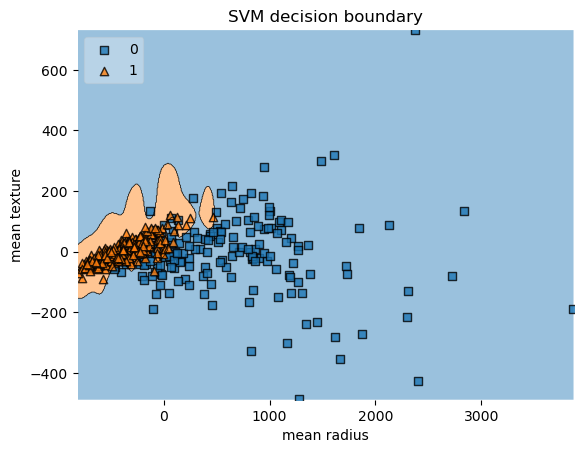

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification report:\n", report)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)

X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=clf, legend=2)

plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title('SVM decision boundary')
plt.show()
